In [ ]:
# @title WiDSTT 2024
%%html
<div style="padding: 20px; color: white; margin: 0; font-size: 35px; text-align: center; display: flex; border-radius: 5px; background-color: #4CAF50; overflow: auto;"><b>WiDSTT 2024 DCIT BootCamp</b></div>

In [ ]:
# @title Importance of library importing
%%html

<!DOCTYPE html>
<html>

<head>
    <style>
        body {
            background-color: #f7f3b1;
            color: #333; /* Dark gray text color */
            font-family: Arial, sans-serif; /* Use Arial font */
            margin: 10px; /* Add some margin for better readability */
            padding: 2rem;
        }

        h2 {
            color: #000; /* Dark Green heading color */
        }
    </style>
</head>

<body>
    <h2>Importing Library and Dataset</h2>

    <p>
        <strong>These very prominent libraries are imported for various tasks related to visualization,preprocessing,data manipulation , and machine learning model building. They provide crucial tools and functions to streamline the data analysis and machine learning workflow.</strong>
    </p>
</body>

</html>

In [ ]:
# This mounts your google drive to eaily access the files in the cloud, need to grant such
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import the DataSet
import numpy as np # For Data Manipulation
import pandas as pd # For Data Manipulation
import seaborn as sns # For Data Visualisation
import matplotlib.pyplot as plt # For Data Visualisation
from sklearn.model_selection import train_test_split #  For splitting the dataset
from sklearn.linear_model import LinearRegression # For building a machine learning model: linear regression model
from sklearn.metrics import mean_squared_error # For evaluating model performance
from sklearn.preprocessing import StandardScaler, OneHotEncoder # For data preprocessing
from sklearn.impute import SimpleImputer # For handling missing values

# Set default figure size and font setting
plt.rcParams['figure.figsize']=[8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'

#Set the default style for Seaborn plots
sns.set_style('whitegrid')

In [ ]:
# Load the datasets
# This data is the wids university challenge dataset

Student_Perf = pd.read_csv('./drive/MyDrive/Colab Notebooks/BOOTCAMP Project/StudentsPerformance.csv')  # replace with the location of your files in the cloud
pd.set_option("display.max_rows",10)


In [ ]:
# @title Note
%%html
<!DOCTYPE html>
<html>

<head>
    <style>
        body {
            background-color: #cce5ff; /* Nice shade of light blue */
            color: #333; /* Dark gray text color */
            font-family: Arial, sans-serif; /* Use Arial font */
            margin: 10px; /* Add some margin for better readability */
            padding: 2rem;
        }

        h2 {
            color: #000; /* Dark Green heading color */
        }
        .important{
          font-size: 1.2rem;
          font-weight: bold;
        }
    </style>
</head>

<body>

    <p class="important">
        <i><strong>Note: </strong> We can use an `alias` so we don't have to repeatedly type pandas. Example: import pandas as pd, Now anywhere in the notebook we can use pd in place of pandas.</i>
    </p>
</body>

</html>


### Methodology for our Student Performance Analysis

- Importing a Tabular Dataset
- Cleaning and Preprocessing the Data
- Exploring and Analyzing Tabular Data
- Choosing and Creating Features
- Training a Machine Learning Model
- Evaluating a Machine Learning Model

## Exploratory Data Analysis


- Incorporation of EDA operation such:

i) Revealed that data is suitably comprehensive and reliably insightful for further investigative analyis.

ii) Identify any distributional shifts/ anormalies in Data-Set and resolve these circumstances accordingly.

iii) Further insights in relation to correlation matrix,covariance and other indepth relations.


In [ ]:
Student_Perf.shape

(1000, 8)

In [ ]:
Student_Perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
#rename columns
Student_Perf.rename(columns=({'gender':'Gender','race/ethnicity':'Race/Ethnicity'
                     ,'parental level of education':'Parental_Level_of_Education'
                     ,'lunch':'Lunch','test preparation course':'Test_Preparation_Course'
                      ,'math score':'Math_Score','reading score':'Reading_Score'
                     ,'writing score':'Writing_Score'}),inplace=True)

In [ ]:
## .dtypes.unique() establishes each distinguished data types whether it 'int64','obj/O'
Student_Perf.dtypes.unique()

array([dtype('O'), dtype('int64')], dtype=object)

### Using describe()

- This table summarizes the count, mean, standard deviation, minimum, 25th percentile(Q1), median( 50th percentile or Q2), 75th percentile (Q3) and maximum values for each variable in the train_data_regression DataFrame.

In [ ]:
## Exploratory Data Analysis (EDA)
# Display the basic statistics of the training data
Student_Perf.describe()


,Math_Score,Reading_Score,Writing_Score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
## The first 10 rows of the Student Performance DataSet.
Student_Perf.head()

,Gender,Race/Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
## The last/bottom 10 rows of the Student Performnce DataSet.
Student_Perf.tail()

,Gender,Race/Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
Student_Perf['Race/Ethnicity'].value_counts()

Race/Ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [ ]:
## Determine if the iterable columns of Students Performance DataSet is NULL (True) or False accordingly.
all_nan_cols = Student_Perf.columns[Student_Perf.isna().all()]
all_nan_cols

Index([], dtype='object')

- A data type object (an instance of numpy. dtype class) describes how the bytes in the fixed-size block of memory corresponding to an array item should be interpreted.It describes the following aspects of the data: Type of the data (integer, float, Python object, etc.)

- The all() function returns True if all items in an iterable are true, otherwise it returns False.If the iterable object is empty, the all() function also returns True.

In [ ]:
all_nan_cols = Student_Perf.columns[Student_Perf.isna().any()]
all_nan_cols

Index([], dtype='object')

-

- Furthermore by advance,examine by investigating the distributional spread of NAN-values within columns of DataSet. Additionally deciphering whether to discards/ removal of selective columns.

In [ ]:
# @title Note
%%html
<!DOCTYPE html>
<html>

<head>
    <style>
        body {
            background-color: #cce5ff; /* Nice shade of light blue */
            color: #333; /* Dark gray text color */
            font-family: Arial, sans-serif; /* Use Arial font */
            margin: 10px; /* Add some margin for better readability */
            padding: 2rem;
        }

        h2 {
            color: #000; /* Dark Green heading color */
        }
        .important{
          font-size: 1.2rem;
          font-weight: bold;
        }
    </style>
</head>

<body>

    <p class="important">
        <i><strong>Note: </strong>Understanding the shape of the dataset is crucial for various data analysis tasks, as it provides an overview of the dataset's size and structure. This knowledge helps you comprehend the amount of data you have and the dimensions along which you can perform analyses or transformations.</i>
    </p>
</body>

</html>

## Importance of Checking for Missing Values

- **Data Quality Assurance:** Identifying missing values is crucial for ensuring dataset quality, as missing data can lead to biased or inaccurate analyses.

- **Data Cleaning:** Knowing which columns have missing values allows for strategic handling, including imputation, removal of rows/columns, or other techniques based on the extent of missingness and data nature.

- **Feature Engineering:** The presence of missing values provides insights; a variable with many missing values may reveal patterns or its importance for analysis.

- **Modeling Considerations:** Dealing with missing values is essential before training models, as some algorithms cannot handle them. Imputation or removal is often part of data preprocessing for machine learning models.

In [ ]:
# check for the correspounding number of missing values each assiociating column.
Missing_Values_Col = Student_Perf.isna().sum()
pd.set_option('display.max_rows', None) # display all the all datasets.
print(Missing_Values_Col)

Gender                         0
Race/Ethnicity                 0
Parental_Level_of_Education    0
Lunch                          0
Test_Preparation_Course        0
Math_Score                     0
Reading_Score                  0
Writing_Score                  0
dtype: int64


In [ ]:
Total_Cel = np.product(Student_Perf.shape)
Total_Missing_Values = Missing_Values_Col.sum()
Total_Perc_NAN_DS = (Total_Missing_Values/Total_Cel) * 100
Total_Perc_NAN_DS

0.0

In [ ]:
Student_Perf.duplicated().any()

False

In [ ]:
# @title Note
%%html
<!DOCTYPE html>
<html>

<head>
    <style>
        body {
            background-color: #cce5ff; /* Nice shade of light blue */
            color: #333; /* Dark gray text color */
            font-family: Arial, sans-serif; /* Use Arial font */
            margin: 10px; /* Add some margin for better readability */
            padding: 2rem;
        }

        h2 {
            color: #000; /* Dark Green heading color */
        }
        .important{
          font-size: 1.2rem;
          font-weight: bold;
        }
    </style>
</head>

<body>

    <p class="important">
        <i><strong>Note: </strong> We've seen how to print the summary statistics (EDA) in conjuction with investigative analysis of missing values all the columns within Student Performance DataSet. Proceeds in determining how would we display the summary statistics for numerical values?</i>
    </p>
</body>

</html>

## Numerical Columns in a Dataset

In a dataset, a **numerical column** is a column that contains numerical (quantitative) data. Numerical data are values that represent measurable quantities and can be subjected to mathematical operations. Numerical columns can be further categorized into two main types:

In a dataset, a **numerical column** is a column that encompasses numerical (; quantitative) data. This expresses values that represent measurable quantities as cateogorised for mathematical computations. This can be extended and classified into two distinctive types:
    
      
  i)  **Continuous Numerical Columns:** These columns contain continuous data that can take any real value within a certain range. Examples include height, weight, temperature, and income.

    
  ii) **Discrete Numerical Columns:** These columns contain discrete data, which means the values are distinct and separate. Examples include the number of siblings, number of rooms in a house, or the count of items.

In [ ]:
# retrieves only the numerical columns in the dataset
Numer_StPer_DS=Student_Perf.select_dtypes(include = np.number)
Numer_StPer_DS[0:15]

,Math_Score,Reading_Score,Writing_Score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
5,71,83,78
6,88,95,92
7,40,43,39
8,64,64,67
9,38,60,50


In [ ]:
Numer_StPer_DS.min()

Math_Score        0
Reading_Score    17
Writing_Score    10
dtype: int64

In [ ]:
# @title Note
%%html
<!DOCTYPE html>
<html>

<head>
    <style>
        body {
            background-color: #cce5ff; /* Nice shade of light blue */
            color: #333; /* Dark gray text color */
            font-family: Arial, sans-serif; /* Use Arial font */
            margin: 10px; /* Add some margin for better readability */
            padding: 2rem;
        }

        h2 {
            color: #000; /* Dark Green heading color */
        }
        .important{
          font-size: 1.2rem;
          font-weight: bold;
        }
    </style>
</head>

<body>

    <p class="important">
        <i><strong>Note: </strong> Numerical columns are crucial for Quantitative Analysis, Statistical Modeling, and various Machine Learning Algorithms. Common statistical measures such as mean, median, standard deviation, and percentiles are often applied to numerical columns to understand the central tendency, spread, and distribution of the data.</i>
    </p>
</body>

</html>

- Non- numerical columns commonly referred as categorical columns, containing data representing labels or categories.

    - This such data displayes a fixed and limited number of possible values such as gender, grades, blood group type. By extension there are there are two main types of categorical data: nominal and ordinal.

    -  Sorting of these variables uses logical order. For example, gender is a categorical variable and has categories – male and female and there is no intrinsic ordering to the categories


### Nominal Data:

- Nominal data consists of categories with no inherent order or ranking.
- Examples: colors, gender, types of fruit.

### Ordinal Data:

- Ordinal data has categories with a meaningful order or ranking.
- While the exact numerical difference between categories may not be well-defined, there is a clear order.
- Examples: education levels (e.g., high school, college, graduate), customer satisfaction ratings (e.g., low, medium, high).

In [ ]:
# retreives the categorical features
Categ_StuPer_DS=Student_Perf.select_dtypes(include="object")
Categ_StuPer_DS[0:15]


,Gender,Race/Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
5,female,group B,associate's degree,standard,none
6,female,group B,some college,standard,completed
7,male,group B,some college,free/reduced,none
8,male,group D,high school,free/reduced,completed
9,female,group B,high school,free/reduced,none


In [ ]:
Categ_StuPer_DS.groupby('Gender')['Lunch'].value_counts()

Gender  Lunch       
female  standard        329
        free/reduced    189
male    standard        316
        free/reduced    166
Name: count, dtype: int64

In [ ]:
Categ_StuPer_DS.groupby('Gender')['Parental_Level_of_Education'].value_counts()

Gender  Parental_Level_of_Education
female  some college                   118
        associate's degree             116
        high school                     94
        some high school                91
        bachelor's degree               63
        master's degree                 36
male    some college                   108
        associate's degree             106
        high school                    102
        some high school                88
        bachelor's degree               55
        master's degree                 23
Name: count, dtype: int64

In [ ]:
Categ_StuPer_DS.groupby('Gender')[['Parental_Level_of_Education','Test_Preparation_Course']].value_counts()

Gender  Parental_Level_of_Education  Test_Preparation_Course
female  some college                 none                       76
        associate's degree           none                       74
        high school                  none                       65
        some high school             none                       56
        associate's degree           completed                  42
        some college                 completed                  42
        bachelor's degree            none                       41
        some high school             completed                  35
        high school                  completed                  29
        master's degree              none                       22
        bachelor's degree            completed                  22
        master's degree              completed                  14
male    high school                  none                       75
        some college                 none                       73
 

## Dataset Overview

- **Number of Rows (Observations):** There are 1000 rows in the dataset. Each row corresponds to a different observation, which could be a individuals' healthcare evaluation, athletes' performance on an event, weather altercations patterns depending on the nature of your dataset.

- **Number of Columns (Variables):** There are 8 columns in the dataset. Each column represents a different variable or feature, such as gender, race/ethinicity, parental level of education, and so on.

In [ ]:
Student_Perf.columns

Index(['Gender', 'Race/Ethnicity', 'Parental_Level_of_Education', 'Lunch',
       'Test_Preparation_Course', 'Math_Score', 'Reading_Score',
       'Writing_Score'],
      dtype='object')

## Advantages of Using a Pie Chart for Patient Race Distribution

- **Clear Representation:** A pie chart effectively shows the proportion of each category in the 'patient_race' column, providing a clear view of each group's relative size.

- **Limited Categories:** With a small number of patient race categories, a pie chart is concise and avoids overwhelming viewers with excessive details.

- **Percentage Contribution:** Including percentages in each pie slice allows for a quick understanding of the relative prevalence of each patient race category.

- **Visual Comparison:** The visual nature of a pie chart aids in straightforward comparisons between categories, helping identify dominant and minority groups.

- **Intuitive Understanding:** Pie charts are intuitive and widely understood, making them accessible to a broad audience, including those with limited statistical or data visualization expertise.

- **Summarizing Categorical Data:** Particularly useful for summarizing the distribution of categorical data, pie charts are suitable for visualizing patient race demographics in this context.

####**Note**: Basic Level: Data Visulisation of Cateogrical Data

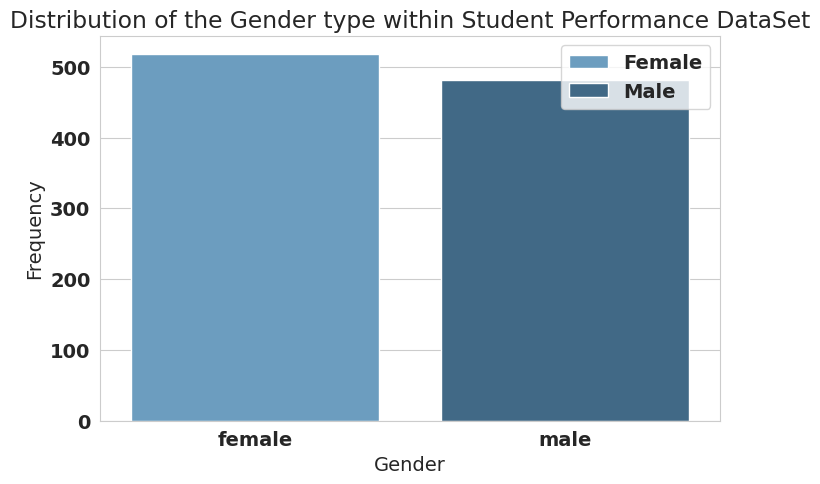

In [ ]:
sns.barplot(x= Student_Perf['Gender'].value_counts().index, y=Student_Perf['Gender'].value_counts(),palette="Blues_d", hue=['Female','Male'])
plt.xlabel('Gender')
plt.ylabel('Frequency')

plt.title('Distribution of the Gender type within Student Performance DataSet')
plt.show()


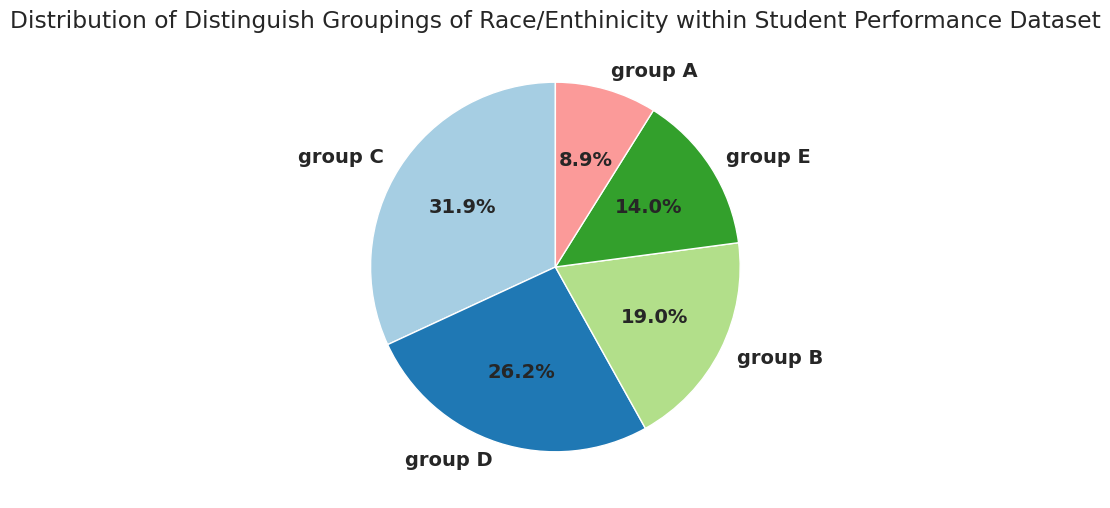

In [ ]:
# Value Counts for 'Race/Ethnicity' column
race_ethnicity_value_count = Student_Perf['Race/Ethnicity'].value_counts()

#Plotting a pie chart
plt.figure(figsize=(8,6))
plt.pie(race_ethnicity_value_count, labels=race_ethnicity_value_count.index, colors=plt.cm.Paired.colors, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Distinguish Groupings of Race/Enthinicity within Student Performance Dataset")
plt.show()

In [ ]:
parent_L_Ed_counts = Student_Perf['Parental_Level_of_Education'].value_counts()
parent_L_Ed_pct = (parent_L_Ed_counts/Student_Perf.shape[0]) * 100.0

# concatenate counts and percentage of total
parent_L_Ed_counts = pd.concat([parent_L_Ed_counts,parent_L_Ed_pct], axis=1)
parent_L_Ed_counts.reset_index(inplace=True)

# rename columns
parent_L_Ed_counts.columns = ['Parental_Level_Education','frequency','pct_total']
parent_L_Ed_counts

,Parental_Level_Education,frequency,pct_total
0,some college,226,22.6
1,associate's degree,222,22.2
2,high school,196,19.6
3,some high school,179,17.9
4,bachelor's degree,118,11.8
5,master's degree,59,5.9


<ipython-input-27-89314a0eae4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  h =sns.barplot(data=parent_L_Ed_counts,x= "Parental_Level_Education", y="frequency" ,ax=ax,


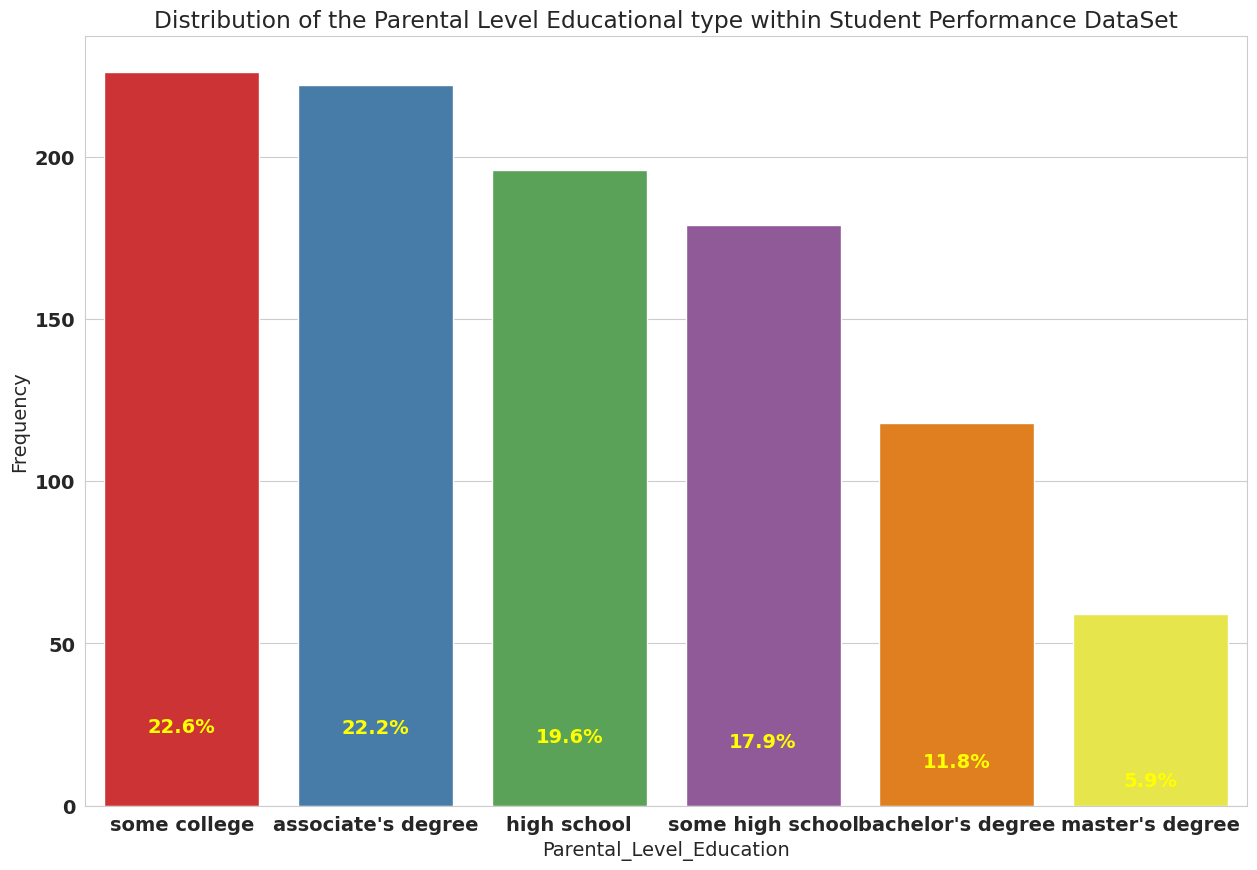

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
h =sns.barplot(data=parent_L_Ed_counts,x= "Parental_Level_Education", y="frequency" ,ax=ax,
            hue_order =['some college','associates degree','high school',
            'some high school','bachelors degree','masters degree'],
            palette='Set1')
plt.xlabel('Parental_Level_Education')
plt.ylabel('Frequency')
plt.title('Distribution of the Parental Level Educational type within Student Performance DataSet')

# loop through each row and annotate corresponding bar with the percent of total
for index, row in parent_L_Ed_counts.iterrows():
    h.text(row.name, row.pct_total, str(round(row.pct_total,3))[:4] + "%",
           color='yellow', ha="center")



In [ ]:
## race/ethnicity, test preparation course
RacEnthn_TesPrepC = Student_Perf.groupby(['Race/Ethnicity','Test_Preparation_Course']).size().sort_values(ascending =False)
RacEnthn_TesPrepC

Race/Ethnicity  Test_Preparation_Course
group C         none                       202
group D         none                       180
group B         none                       122
group C         completed                  117
group D         completed                   82
group E         none                        80
group B         completed                   68
group E         completed                   60
group A         none                        58
                completed                   31
dtype: int64

In [ ]:
## gender, lunch
Stu_Gend_LunC = Student_Perf.groupby(['Gender','Lunch']).size().sort_values(ascending =False)
Stu_Gend_LunC

Gender  Lunch       
female  standard        329
male    standard        316
female  free/reduced    189
male    free/reduced    166
dtype: int64

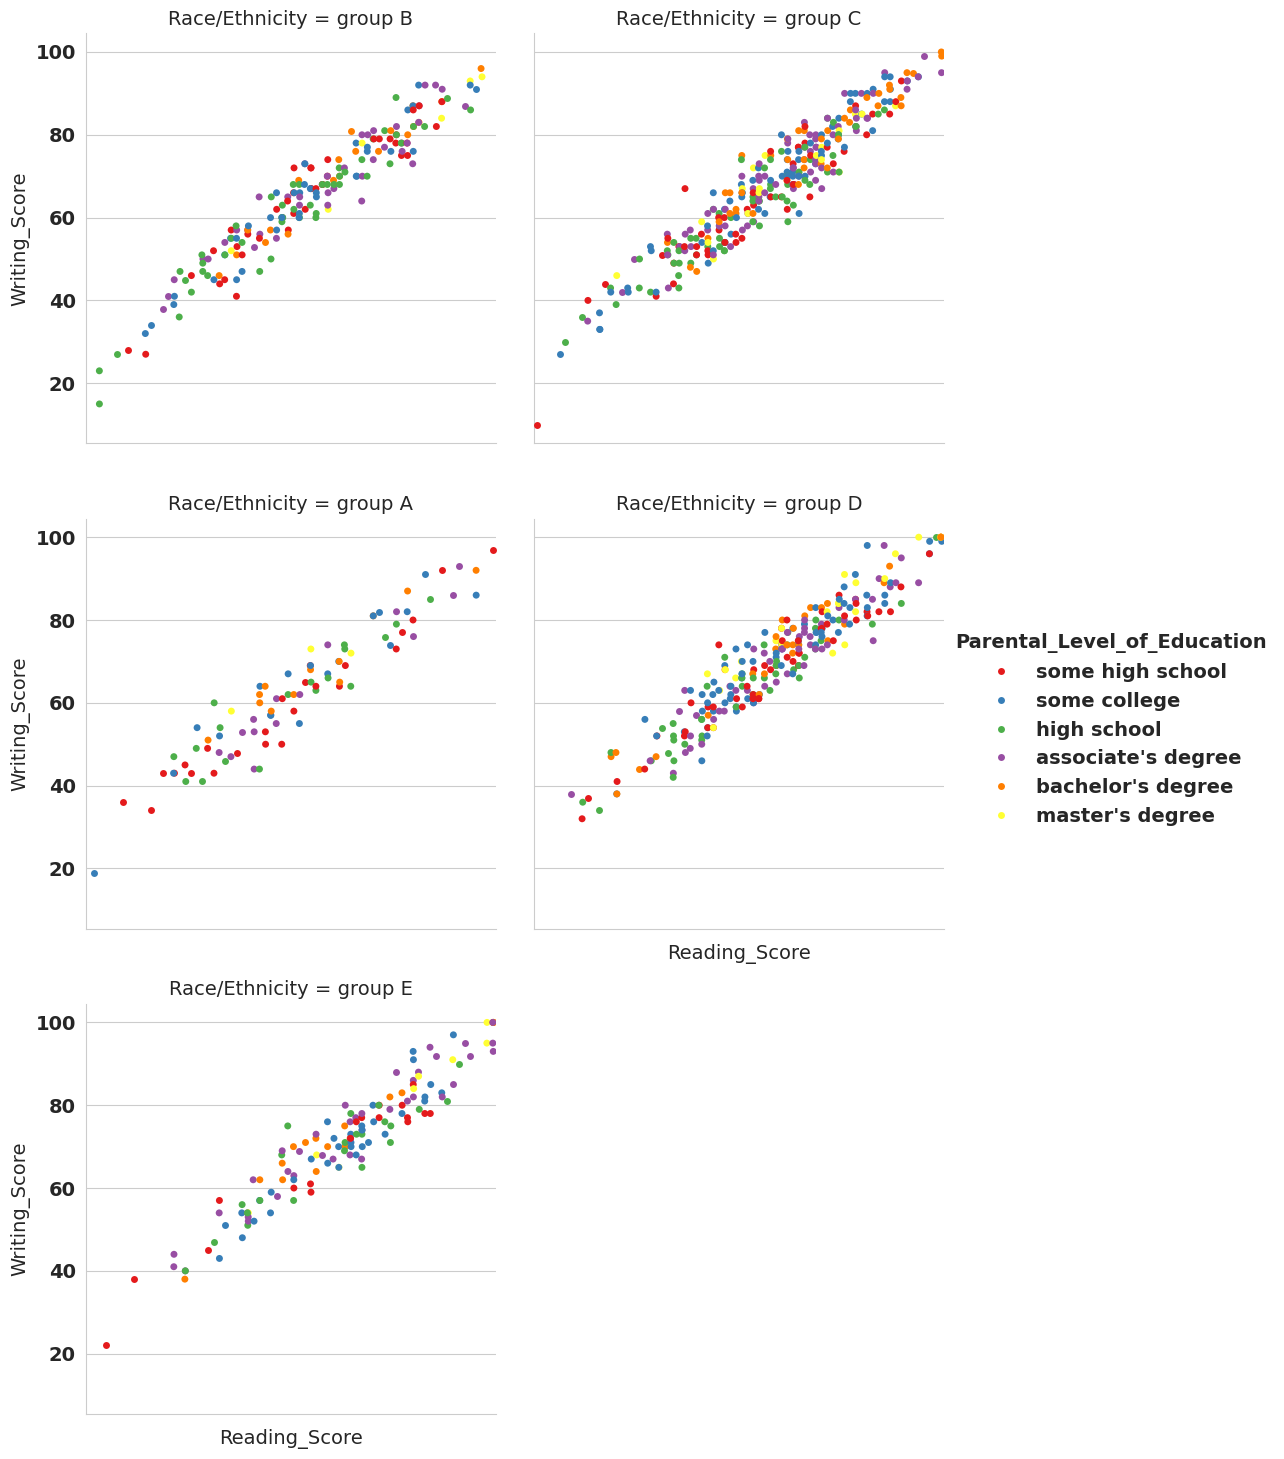

In [ ]:
'''
  Catplot are used to plot relationships with categorical and numeric variables
    Here we use catplot to show patient age and treatment period by region
    Using catplot allows us to have one column for each region
    and we can see that the Midwest region has very little medicaid in comparison
'''

g = sns.catplot(Student_Perf, x = 'Reading_Score', y='Writing_Score',
                    hue='Parental_Level_of_Education', col='Race/Ethnicity', col_wrap=2,
                    palette='Set1')
_ = g.set_xticklabels('')
# _ = g.ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

- Initalise the required value, whereby assigning the minimum mark to pass an exam is 50.

In [ ]:
Stud_PasMark = 50

- numpy.where() function returns the correspounding indices of elements in an elements in an input array where the given condition is satisfied respectively.


In [ ]:
Student_Perf['Math_EvalStat'] = np.where(Student_Perf['Math_Score'] < Stud_PasMark, 'Fail', 'Pass')
Student_Perf['Math_EvalStat'].value_counts()

Math_EvalStat
Pass    865
Fail    135
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Successful, Math Evaluation Students Performance')

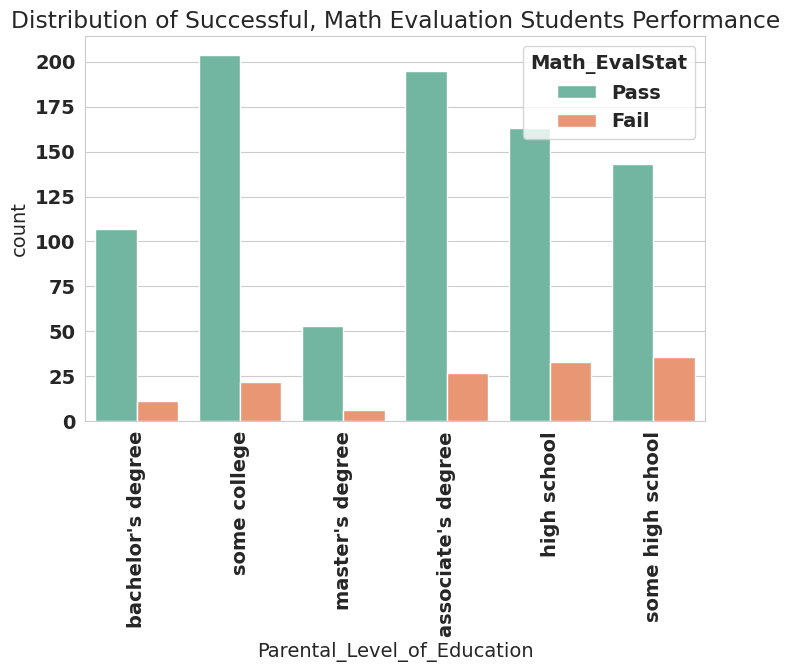

In [ ]:
p= sns.countplot(x='Parental_Level_of_Education', data = Student_Perf, hue = 'Math_EvalStat', palette='Set2')
_ = plt.setp(p.get_xticklabels(), rotation =90)
plt.title('Distribution of Successful, Math Evaluation Students Performance')

In [ ]:
Student_Perf['Read_EvalStat'] = np.where(Student_Perf['Reading_Score'] < Stud_PasMark, 'Fail', 'Pass' )
Student_Perf['Read_EvalStat'].value_counts()

Read_EvalStat
Pass    910
Fail     90
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Successful, Reading Evaluation Students Performance')

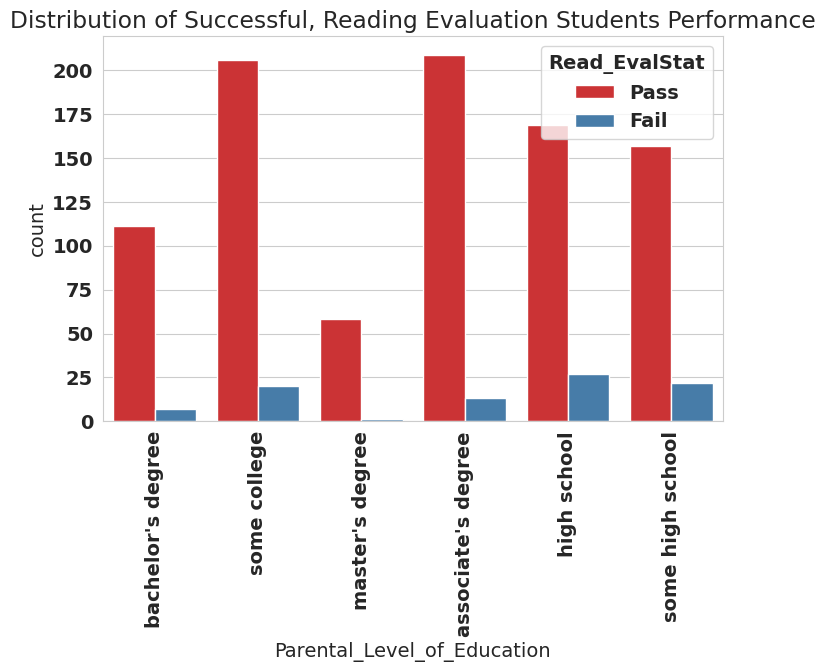

In [ ]:
p = sns.countplot(x ='Parental_Level_of_Education', data=Student_Perf, hue ='Read_EvalStat', palette='Set1')
_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.title('Distribution of Successful, Reading Evaluation Students Performance')

In [ ]:
Student_Perf['Writ_EvalStat'] = np.where(Student_Perf['Writing_Score'] < Stud_PasMark,  'Fail', 'Pass')
Student_Perf['Writ_EvalStat'].value_counts()

Writ_EvalStat
Pass    886
Fail    114
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Succesful, Writing Evaluation Student Perfromance')

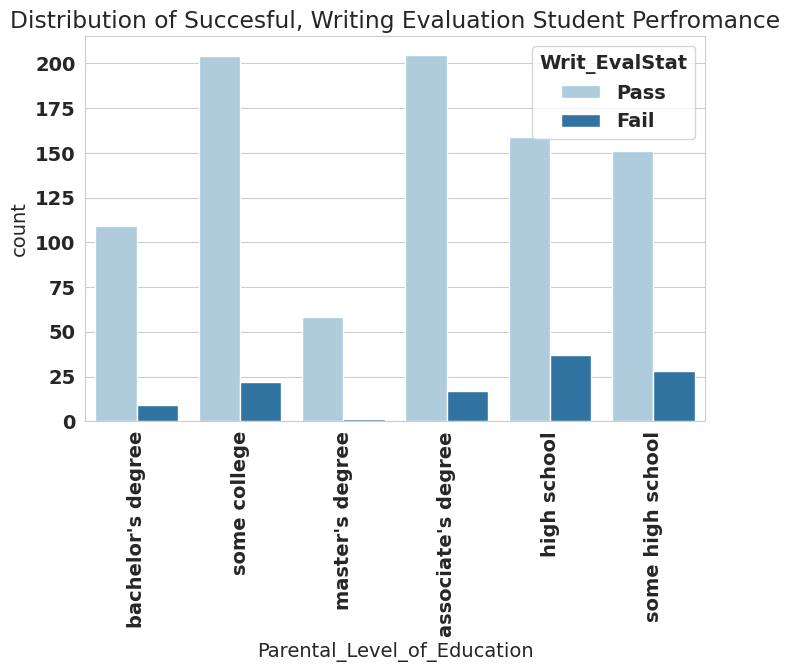

In [ ]:
p = sns.countplot(x ='Parental_Level_of_Education',data=Student_Perf , hue='Writ_EvalStat', palette='Paired')
_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.title('Distribution of Succesful, Writing Evaluation Student Perfromance')

In [ ]:
Student_Perf['Overall_StuPer_Stat'] = Student_Perf.apply(lambda x:'Pass' if x['Math_EvalStat']=='Pass' and
                                                         x['Read_EvalStat'] == 'Pass' and x['Writ_EvalStat']=='Pass'
                                                         else 'Fail',  axis = 1 )
Student_Perf['Overall_StuPer_Stat'].value_counts()

Overall_StuPer_Stat
Pass    812
Fail    188
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of student cateogorised level of education by their level Race/Ethnicity')

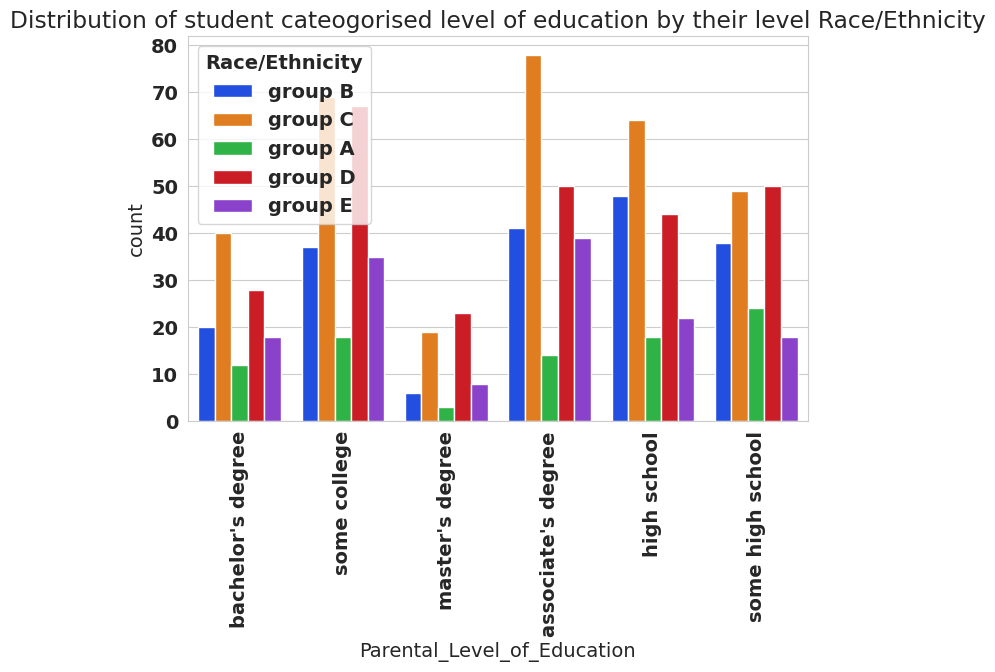

In [ ]:
p= sns.countplot(x='Parental_Level_of_Education', data = Student_Perf,hue=('Race/Ethnicity'), palette='bright' )
_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.title('Distribution of student cateogorised level of education by their level Race/Ethnicity')


In [ ]:
Student_Perf.head()

,Gender,Race/Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Math_EvalStat,Read_EvalStat,Writ_EvalStat,Overall_StuPer_Stat
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass,Pass
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass,Pass
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,Fail,Pass,Fail,Fail
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass,Pass


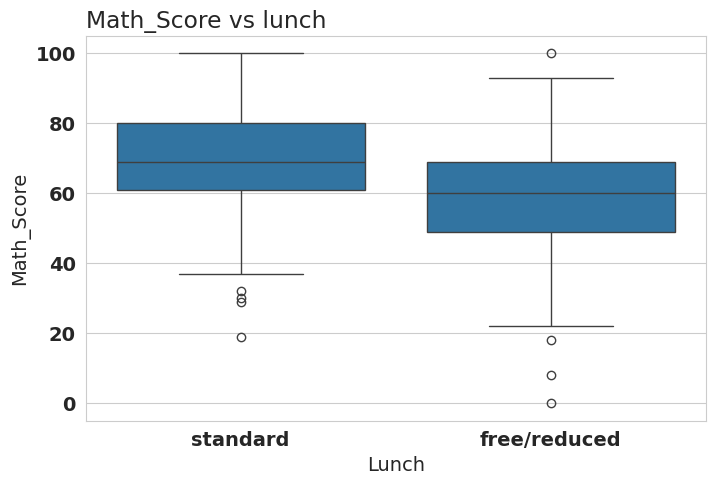

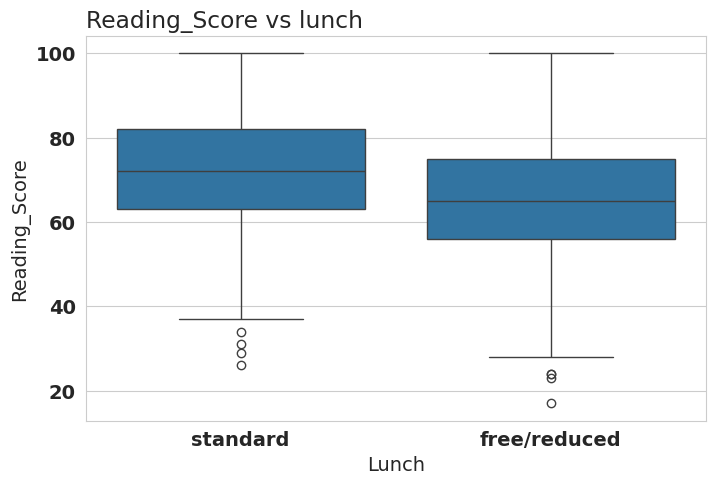

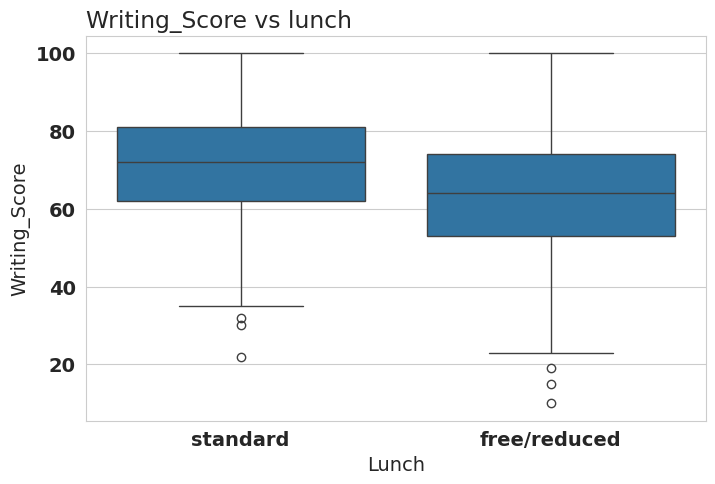

In [ ]:
for Col_N in Student_Perf.columns[-7:-4]:
    sns.boxplot(x=Student_Perf["Lunch"], y=Student_Perf[Col_N])
    plt.title(Col_N +" vs lunch", loc="left")
    plt.show()

In [ ]:
##Students are easier to get better score once they eat standardly.

In [ ]:
Student_Perf.drop(Student_Perf.iloc[:, 8:], inplace=True, axis=1)

In [ ]:
Student_Perf.head()

,Gender,Race/Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Data Preprocessing and Evaluation of Model's Predictions.

- Particularly, focus on specific features that exhibited close correlations to student performance.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
labelencoder = LabelEncoder()
train_StuPer_DS = Student_Perf.copy()
train_StuPer_DS['Parental_Level_of_Education'] = labelencoder.fit_transform(train_StuPer_DS['Parental_Level_of_Education'])
train_StuPer_DS['Test_Preparation_Course'] = labelencoder.fit_transform(train_StuPer_DS['Test_Preparation_Course'])
train_StuPer_DS['Lunch'] = labelencoder.fit_transform(train_StuPer_DS['Lunch'])
train_StuPer_DS.head()

,Gender,Race/Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score
0,female,group B,1,1,1,72,72,74
1,female,group C,4,1,0,69,90,88
2,female,group B,3,1,1,90,95,93
3,male,group A,0,0,1,47,57,44
4,male,group C,4,1,1,76,78,75


In [ ]:
train_StuPer_DS.drop

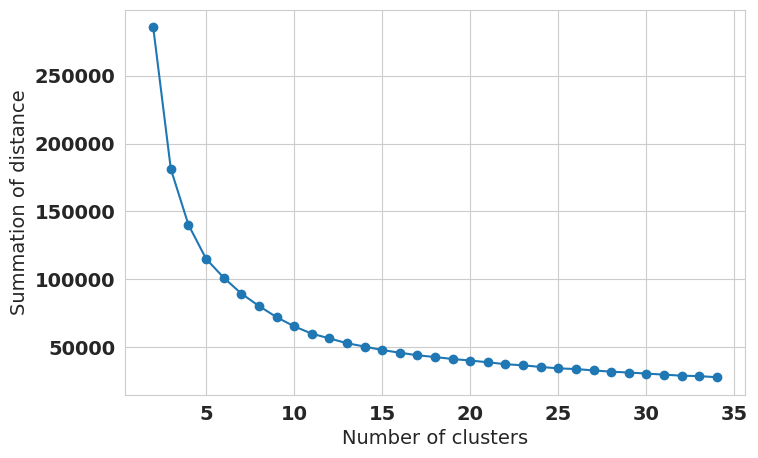

In [ ]:
kmeans_Dist = list()
for idx_ClStPer in range(2,35):
  kmeans= KMeans(init="k-means++", n_clusters=idx_ClStPer,n_init = 30)
  kmeans.fit_transform(train_StuPer_DS.iloc[:, 2:])
  kmeans_Dist.append(kmeans.inertia_)
plt.plot(list(range(2,35)), kmeans_Dist, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Summation of distance")
plt.show()

Note: When identfiying the elbow point; Must be noted that the ideal k values typically addressed as the "elbow" of the curve. This is the point where the **WCSS** starts to decrease at a much slower rate.

Therefore highighting the point whereby accomodation of more clusters significantly improved the overall fit within the clusters accordingly.


In [ ]:
# Suitable demarcation at k=8, assigned as the elbow point.

In [ ]:
kmeans = KMeans(init = "k-means++", n_clusters=8)
kmeans.fit_transform(train_StuPer_DS.iloc[:, 2:])
kmeans_Lab = kmeans.labels_
train_StuPer_DS['Classif_Met'] = kmeans_Lab
train_StuPer_DS.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Race/Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Classif_Met
0,female,group B,1,1,1,72,72,74,6
1,female,group C,4,1,0,69,90,88,6
2,female,group B,3,1,1,90,95,93,3
3,male,group A,0,0,1,47,57,44,7
4,male,group C,4,1,1,76,78,75,6
5,female,group B,0,1,1,71,83,78,6
6,female,group B,4,1,0,88,95,92,3
7,male,group B,4,0,1,40,43,39,2
8,male,group D,2,0,0,64,64,67,4
9,female,group B,2,0,1,38,60,50,7


In [ ]:
Classif_Eval = train_StuPer_DS.groupby('Classif_Met')[train_StuPer_DS.columns[-4:-1]].mean()
Classif_Eval

,Math_Score,Reading_Score,Writing_Score
Classif_Met,,,
0,60.092857,58.057143,56.364286
1,82.328671,81.762238,80.349650
2,32.135135,35.972973,33.594595
3,88.463918,92.793814,92.690722
4,57.926174,67.832215,67.993289
5,73.175182,68.416058,66.802920
6,68.337500,78.062500,77.731250
7,47.759124,51.437956,49.043796
